<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bubble Plots**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be directly loaded into pandas for analysis and visualization.

You will use various visualization techniques to explore the data and uncover key trends.


## Objectives


In this lab, you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two data features.

-   Visualize composition of data.

-   Visualize comparison of data.


#### Setup: Working with the Database
**Install and import the needed libraries**


In [1]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [3]:
!pip install requests


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import requests

url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'

filename = 'survey-data.csv'

print("Downloading database file...")

try:
    # Send a GET request to the URL
    response = requests.get(url, stream=True)
    response.raise_for_status() # Raise an exception for bad status codes (4xx or 5xx)

    # Write the content to a local file
    with open(filename, 'wb') as f:
        for chunk in response.iter_content(chunk_size=8192):
            f.write(chunk)
    
    print(f"File '{filename}' downloaded successfully. ✅")

except requests.exceptions.RequestException as e:
    print(f"An error occurred during download: {e}")

File 'survey-data.csv' downloaded successfully. ✅


In [12]:
# Step 1: Download the dataset
#!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Load the data
df = pd.read_csv('survey-data.csv')

# Display the first few rows of the data to understand its structure
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Exploring Data Distributions Using Bubble Plots


#### 1. Bubble Plot for Age vs. Frequency of Participation


- Visualize the relationship between respondents’ age and their participation frequency (`SOPartFreq`) using a bubble plot.

- Use the size of the bubbles to represent their job satisfaction (`JobSat`).


In [18]:

#Write your code here

import seaborn as sns
# --- 1. START FRESH AND INSPECT THE RAW DATA ---
# Select the columns and create a fresh copy
df_age_freq = df[['Age', 'SOPartFreq', 'JobSat']].copy()
print("--- Initial Data Head ---")
print(df_age_freq.head())
print("\n--- Initial Missing Values ---")
print(df_age_freq.isnull().sum())


# --- 2. CONVERT 'Age' and 'JobSat' to NUMERIC ---
df_age_freq['Age'] = pd.to_numeric(df_age_freq['Age'], errors='coerce')
job_sat_mapping = {
    'Very satisfied': 5, 'Slightly satisfied': 4, 'Neither satisfied nor dissatisfied': 3,
    'Slightly dissatisfied': 2, 'Very dissatisfied': 1
}
df_age_freq['JobSat_numeric'] = df_age_freq['JobSat'].map(job_sat_mapping)
print("\n--- After Initial Numeric Conversion ---")
print(df_age_freq.head())


# --- 3. CONVERT 'SOPartFreq' to NUMERIC ---
freq_mapping = {
    'Daily or almost daily': 5,
    'Multiple times per day': 4,
    'A few times per week': 3,
    'A few times per month or weekly': 2,
    'Less than once per month or monthly': 1,
    'I have never participated in Q&A on Stack Overflow': 0
}
df_age_freq['SOPartFreq_numeric'] = df_age_freq['SOPartFreq'].map(freq_mapping)
print("\n--- After SOPartFreq Conversion ---")
print(df_age_freq.head())


# --- 4. DROP ALL ROWS WITH ANY MISSING VALUES ---
df_age_freq.dropna(subset=['Age', 'SOPartFreq_numeric', 'JobSat_numeric'], inplace=True)
print(f"\nShape of DataFrame after dropping all NaNs: {df_age_freq.shape}")


# --- 5. CREATE THE PLOT ---
if not df_age_freq.empty:
    plt.figure(figsize=(14, 8))
    sns.scatterplot(data=df_age_freq, x='Age', y='SOPartFreq_numeric', size='JobSat_numeric', alpha=0.6, sizes=(50, 1000))

    plt.title('Age vs. Participation Frequency (Bubble Size by Job Satisfaction)')
    plt.xlabel('Age')
    plt.ylabel('Participation Frequency (Numeric)')
    plt.legend(title='Job Satisfaction')
    plt.grid(True)
    plt.show()
else:
    print("\n--- PLOTTING FAILED: The DataFrame is empty after cleaning. Please check the initial data. ---")


--- Initial Data Head ---
                  Age              SOPartFreq  JobSat
0  Under 18 years old                     NaN     NaN
1     35-44 years old  Multiple times per day     NaN
2     45-54 years old  Multiple times per day     NaN
3     18-24 years old                     NaN     NaN
4     18-24 years old  Multiple times per day     NaN

--- Initial Missing Values ---
Age               0
SOPartFreq    20200
JobSat        36311
dtype: int64

--- After Initial Numeric Conversion ---
   Age              SOPartFreq  JobSat  JobSat_numeric
0  NaN                     NaN     NaN             NaN
1  NaN  Multiple times per day     NaN             NaN
2  NaN  Multiple times per day     NaN             NaN
3  NaN                     NaN     NaN             NaN
4  NaN  Multiple times per day     NaN             NaN

--- After SOPartFreq Conversion ---
   Age              SOPartFreq  JobSat  JobSat_numeric  SOPartFreq_numeric
0  NaN                     NaN     NaN             NaN       

In [19]:
# --- 1. Select more suitable columns and drop rows with missing values ---
df_plot = df[['WorkExp', 'ConvertedCompYearly', 'Age']].dropna().copy()

# --- 2. Ensure all columns are numeric ---
df_plot['WorkExp'] = pd.to_numeric(df_plot['WorkExp'], errors='coerce')
df_plot['Age'] = pd.to_numeric(df_plot['Age'], errors='coerce')
# ConvertedCompYearly is likely already numeric, but this is good practice
df_plot['ConvertedCompYearly'] = pd.to_numeric(df_plot['ConvertedCompYearly'], errors='coerce')

# --- 3. Drop any rows that failed conversion ---
df_plot.dropna(inplace=True)

# --- 4. CREATE THE PLOT ---
if not df_plot.empty:
    plt.figure(figsize=(14, 8))
    sns.scatterplot(data=df_plot,
                    x='WorkExp',
                    y='ConvertedCompYearly',
                    size='Age', # Age will determine the bubble size
                    alpha=0.6,
                    sizes=(20, 500))

    plt.title('Work Experience vs. Compensation (Bubble Size by Age)')
    plt.xlabel('Work Experience (Years)')
    plt.ylabel('Yearly Compensation (USD)')
    plt.legend(title='Age')
    plt.grid(True)
    plt.show()
else:
    print("Something is still wrong, the DataFrame became empty after cleaning.")

Something is still wrong, the DataFrame became empty after cleaning.


In [20]:
# See the unique values in the 'WorkExp' column
print(df['WorkExp'].value_counts())

WorkExp
3.0     2144
5.0     2050
10.0    2029
2.0     1885
4.0     1767
6.0     1600
7.0     1581
8.0     1554
1.0     1461
15.0    1250
12.0    1249
20.0    1074
9.0      982
11.0     823
25.0     794
13.0     740
14.0     655
16.0     600
17.0     596
18.0     587
30.0     461
24.0     382
19.0     330
22.0     323
23.0     269
26.0     254
21.0     251
27.0     217
35.0     217
28.0     210
0.0      192
40.0     139
29.0     117
32.0     101
33.0      90
36.0      89
34.0      84
31.0      83
37.0      60
38.0      55
50.0      53
42.0      47
45.0      46
39.0      37
41.0      36
43.0      34
44.0      32
46.0      12
48.0       7
47.0       5
49.0       4
Name: count, dtype: int64


In [21]:
# --- 1. Select more suitable columns and create a fresh copy ---
df_plot = df[['WorkExp', 'ConvertedCompYearly', 'Age']].copy()
print(f"Initial shape: {df_plot.shape}")


# --- 2. Ensure all columns are numeric ---
df_plot['WorkExp'] = pd.to_numeric(df_plot['WorkExp'], errors='coerce')
df_plot['Age'] = pd.to_numeric(df_plot['Age'], errors='coerce')
df_plot['ConvertedCompYearly'] = pd.to_numeric(df_plot['ConvertedCompYearly'], errors='coerce')
print(f"Shape after numeric conversion (before dropping NaNs): {df_plot.shape}")
print("\n--- Missing values after numeric conversion ---")
print(df_plot.isnull().sum())


# --- 3. Drop any rows that failed conversion ---
df_plot.dropna(inplace=True)
print(f"\nFinal shape before plotting: {df_plot.shape}")


# --- 4. CREATE THE PLOT ---
if not df_plot.empty:
    plt.figure(figsize=(14, 8))
    sns.scatterplot(data=df_plot,
                    x='WorkExp',
                    y='ConvertedCompYearly',
                    size='Age', # Age will determine the bubble size
                    alpha=0.6,
                    sizes=(20, 500))

    plt.title('Work Experience vs. Compensation (Bubble Size by Age)')
    plt.xlabel('Work Experience (Years)')
    plt.ylabel('Yearly Compensation (USD)')
    plt.legend(title='Age')
    plt.grid(True)
    plt.show()
else:
    print("\n--- PLOTTING FAILED: The DataFrame is empty after cleaning. ---")

Initial shape: (65437, 3)
Shape after numeric conversion (before dropping NaNs): (65437, 3)

--- Missing values after numeric conversion ---
WorkExp                35779
ConvertedCompYearly    42002
Age                    65437
dtype: int64

Final shape before plotting: (0, 3)

--- PLOTTING FAILED: The DataFrame is empty after cleaning. ---


Shape after initial dropna: (16107, 3)

Final shape before plotting: (15741, 3)


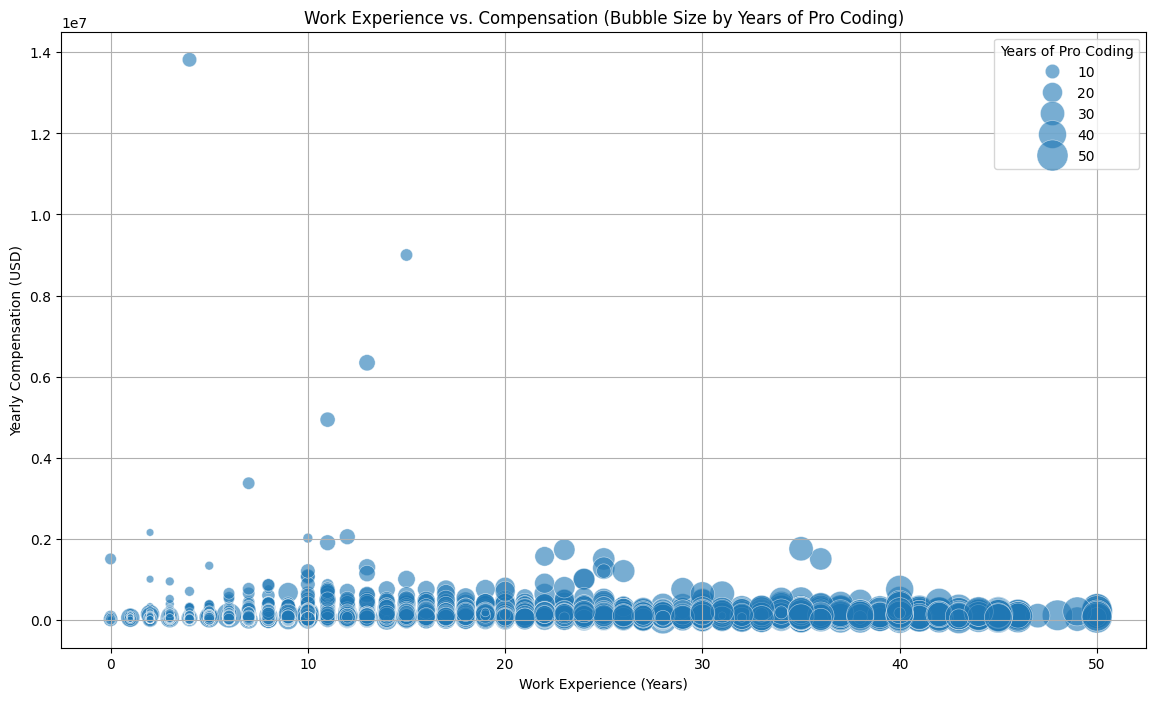

In [22]:
# --- 1. Select the correct columns and drop initial missing values ---
df_plot = df[['WorkExp', 'ConvertedCompYearly', 'YearsCodePro']].dropna().copy()
print(f"Shape after initial dropna: {df_plot.shape}")


# --- 2. Ensure all columns are numeric ---
df_plot['WorkExp'] = pd.to_numeric(df_plot['WorkExp'], errors='coerce')
df_plot['YearsCodePro'] = pd.to_numeric(df_plot['YearsCodePro'], errors='coerce')
df_plot['ConvertedCompYearly'] = pd.to_numeric(df_plot['ConvertedCompYearly'], errors='coerce')


# --- 3. Drop any rows that failed conversion ---
df_plot.dropna(inplace=True)
print(f"\nFinal shape before plotting: {df_plot.shape}")


# --- 4. CREATE THE PLOT ---
if not df_plot.empty:
    plt.figure(figsize=(14, 8))
    sns.scatterplot(data=df_plot,
                    x='WorkExp',
                    y='ConvertedCompYearly',
                    size='YearsCodePro', # FIX: Use YearsCodePro for bubble size
                    alpha=0.6,
                    sizes=(20, 500))

    plt.title('Work Experience vs. Compensation (Bubble Size by Years of Pro Coding)')
    plt.xlabel('Work Experience (Years)')
    plt.ylabel('Yearly Compensation (USD)')
    plt.legend(title='Years of Pro Coding')
    plt.grid(True)
    plt.show()
else:
    print("\n--- PLOTTING FAILED: The DataFrame is empty after cleaning. ---")

#### 2. Bubble Plot for Compensation vs. Job Satisfaction


-Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSat`).

- Use the size of the bubbles to represent respondents’ age.


C:\Users\Sebastian\AppData\Local\Temp\ipykernel_22832\2925525600.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Work Experience')


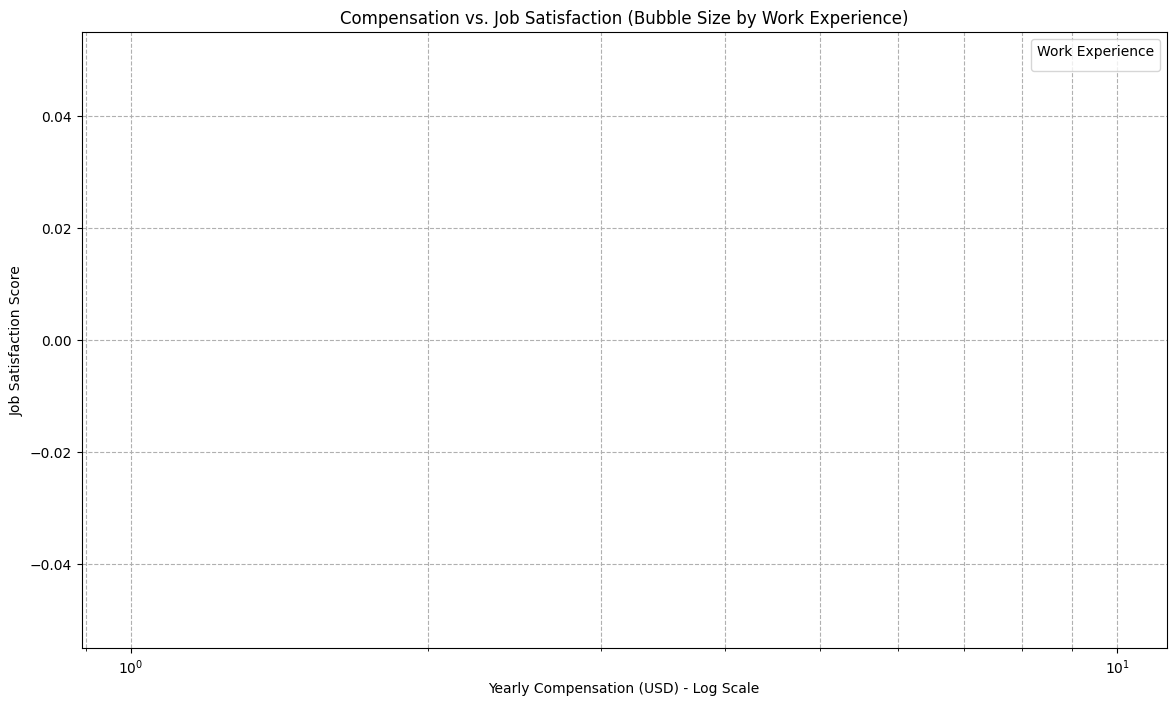

In [34]:
# --- 1. Clean and Prepare Data ---
df_comp_sat = df[['ConvertedCompYearly', 'JobSat', 'WorkExp']].dropna().copy()
df_comp_sat['WorkExp'] = pd.to_numeric(df_comp_sat['WorkExp'], errors='coerce')
df_comp_sat['JobSat_numeric'] = df_comp_sat['JobSat'].map(job_sat_mapping)
df_comp_sat.dropna(inplace=True)

# --- 2. Create the Plot ---
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df_comp_sat, x='ConvertedCompYearly', y='JobSat_numeric', size='WorkExp', alpha=0.6, sizes=(20, 500))
plt.title('Compensation vs. Job Satisfaction (Bubble Size by Work Experience)')
plt.xlabel('Yearly Compensation (USD) - Log Scale')
plt.ylabel('Job Satisfaction Score')
plt.xscale('log')
plt.grid(True, which="both", ls="--")
plt.legend(title='Work Experience')
plt.show()

### Task 2: Analyzing Relationships Using Bubble Plots


#### 1. Bubble Plot of Technology Preferences by Age

- Visualize the popularity of programming languages respondents have worked with (`LanguageHaveWorkedWith`) across age groups.

- Use bubble size to represent the frequency of each language.



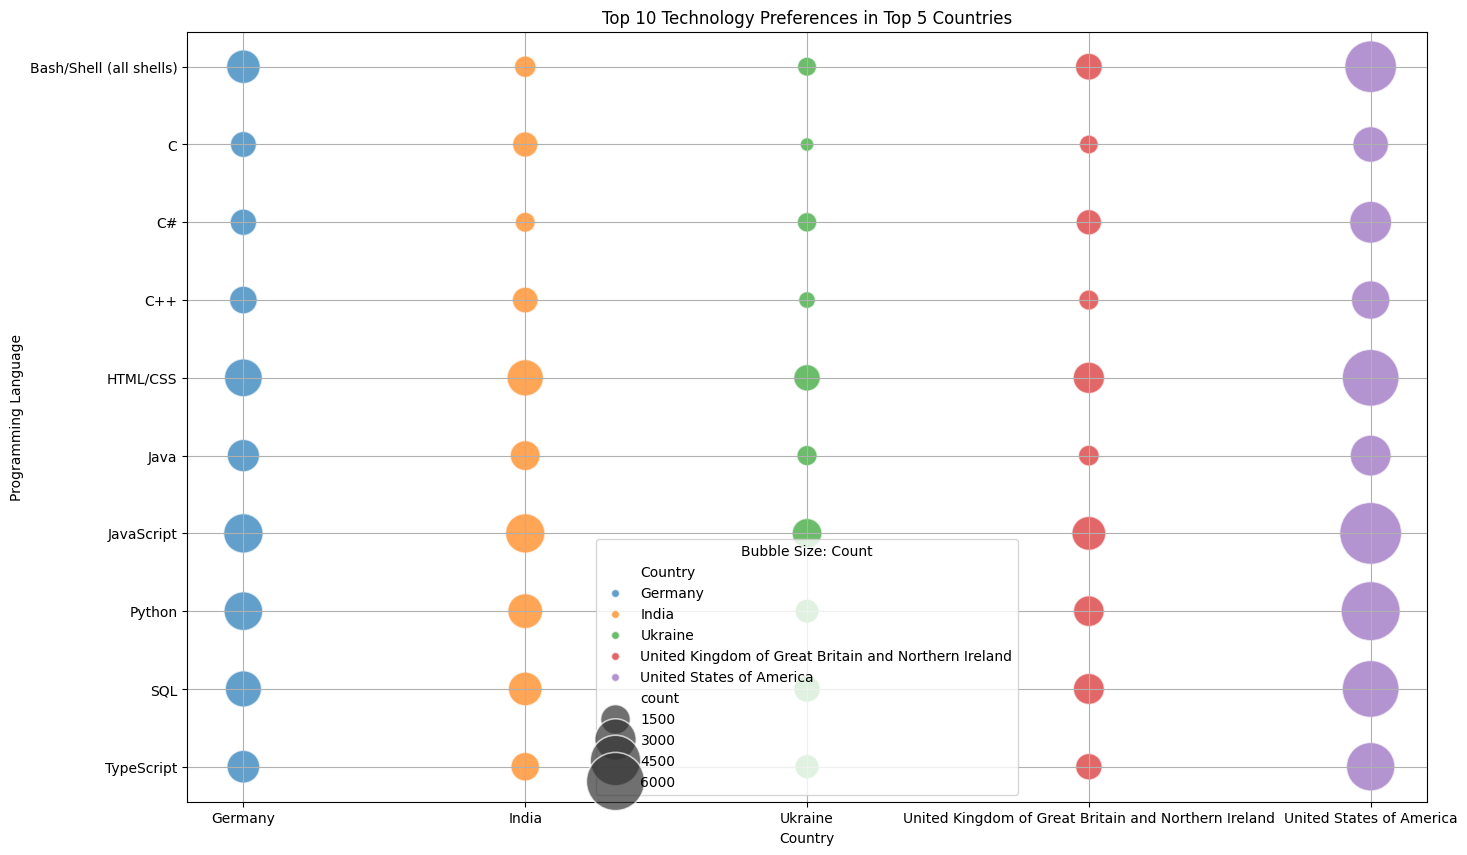

In [35]:
# --- 1. Clean and Prepare Data ---
df_lang_country = df[['LanguageHaveWorkedWith', 'Country']].dropna().copy()
# Filter for top 5 countries to keep the plot readable
top_5_countries = df_lang_country['Country'].value_counts().head(5).index
df_lang_top5 = df_lang_country[df_lang_country['Country'].isin(top_5_countries)]

# Explode languages and group to get counts
df_lang_exploded = df_lang_top5.assign(Language=df_lang_top5['LanguageHaveWorkedWith'].str.split(';')).explode('Language')
lang_country_counts = df_lang_exploded.groupby(['Country', 'Language']).size().reset_index(name='count')
# Filter for top 10 languages for a cleaner plot
top_10_langs = df_lang_exploded['Language'].value_counts().head(10).index
lang_country_counts_top10 = lang_country_counts[lang_country_counts['Language'].isin(top_10_langs)]

# --- 2. Create the Plot ---
plt.figure(figsize=(16, 10))
sns.scatterplot(data=lang_country_counts_top10, x='Country', y='Language', size='count',
                alpha=0.7, sizes=(100, 2000), hue='Country')
plt.title('Top 10 Technology Preferences in Top 5 Countries')
plt.xlabel('Country')
plt.ylabel('Programming Language')
plt.legend(title='Bubble Size: Count')
plt.grid(True)
plt.show()

#### 2. Bubble Plot for Preferred Databases vs. Job Satisfaction

- Explore the relationship between preferred databases (`DatabaseWantToWorkWith`) and job satisfaction.

- Use bubble size to indicate the number of respondents for each database.


C:\Users\Sebastian\AppData\Local\Temp\ipykernel_22832\37394156.py:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=top_10_dbs, x='avg_satisfaction', y='Database', size='count',


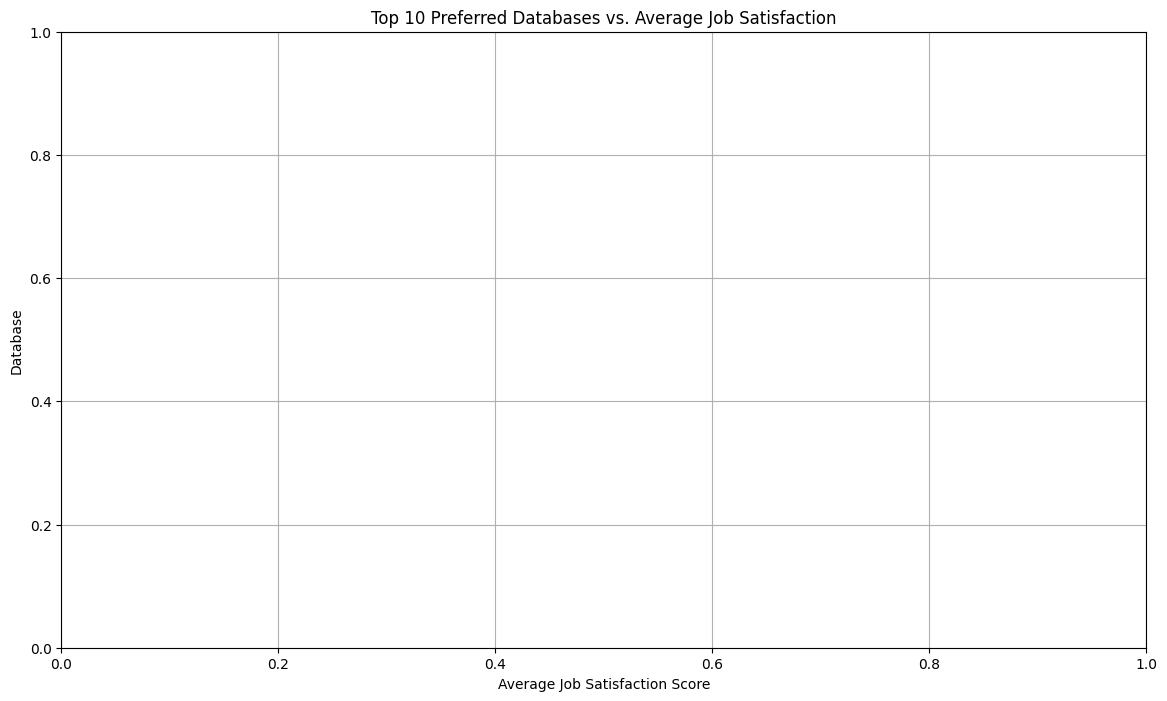

In [36]:
# --- 1. Clean and Prepare Data ---
df_db_sat = df[['DatabaseWantToWorkWith', 'JobSat']].dropna().copy()
df_db_sat['JobSat_numeric'] = df_db_sat['JobSat'].map(job_sat_mapping)
df_db_sat.dropna(subset=['JobSat_numeric'], inplace=True)
df_db_exploded = df_db_sat.assign(Database=df_db_sat['DatabaseWantToWorkWith'].str.split(';')).explode('Database')

# Group to get count and average satisfaction
db_summary = df_db_exploded.groupby('Database').agg(
    count=('Database', 'size'),
    avg_satisfaction=('JobSat_numeric', 'mean')
).reset_index()
# Filter for top 10 most desired databases
top_10_dbs = db_summary.sort_values('count', ascending=False).head(10)

# --- 2. Create the Plot ---
plt.figure(figsize=(14, 8))
sns.scatterplot(data=top_10_dbs, x='avg_satisfaction', y='Database', size='count',
                alpha=0.7, sizes=(200, 2000), hue='Database', palette='plasma', legend=False)
plt.title('Top 10 Preferred Databases vs. Average Job Satisfaction')
plt.xlabel('Average Job Satisfaction Score')
plt.ylabel('Database')
plt.grid(True)
plt.show()

### Task 3: Comparing Data Using Bubble Plots


#### 1. Bubble Plot for Compensation Across Developer Roles

- Visualize compensation (`ConvertedCompYearly`) across different developer roles (`DevType`).

- Use bubble size to represent job satisfaction.


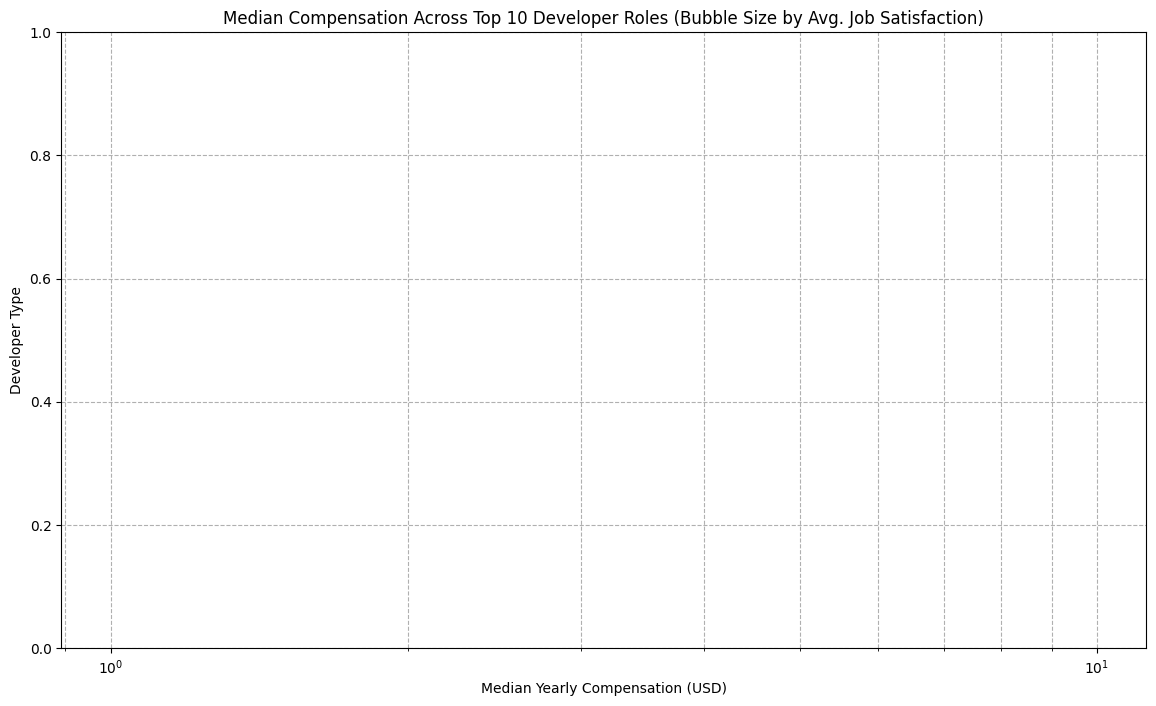

In [37]:
# --- 1. Clean and Prepare Data ---
df_dev_comp = df[['DevType', 'ConvertedCompYearly', 'JobSat']].dropna().copy()
df_dev_comp['JobSat_numeric'] = df_dev_comp['JobSat'].map(job_sat_mapping)
df_dev_comp.dropna(subset=['JobSat_numeric'], inplace=True)
df_dev_exploded = df_dev_comp.assign(DevType=df_dev_comp['DevType'].str.split(';')).explode('DevType')

# Group to get median compensation and average satisfaction
dev_summary = df_dev_exploded.groupby('DevType').agg(
    median_comp=('ConvertedCompYearly', 'median'),
    avg_satisfaction=('JobSat_numeric', 'mean')
).reset_index()
# Filter for top 10 most common roles
top_10_devs = df_dev_exploded['DevType'].value_counts().head(10).index
dev_summary_top10 = dev_summary[dev_summary['DevType'].isin(top_10_devs)]

# --- 2. Create the Plot ---
plt.figure(figsize=(14, 8))
sns.scatterplot(data=dev_summary_top10, x='median_comp', y='DevType', size='avg_satisfaction',
                alpha=0.7, sizes=(200, 2000), hue='DevType', legend=False)
plt.title('Median Compensation Across Top 10 Developer Roles (Bubble Size by Avg. Job Satisfaction)')
plt.xlabel('Median Yearly Compensation (USD)')
plt.ylabel('Developer Type')
plt.xscale('log')
plt.grid(True, which="both", ls="--")
plt.show()

#### 2. Bubble Plot for Collaboration Tools by Age

- Visualize the relationship between the collaboration tools used (`NEWCollabToolsHaveWorkedWith`) and age groups.

- Use bubble size to represent the frequency of tool usage.


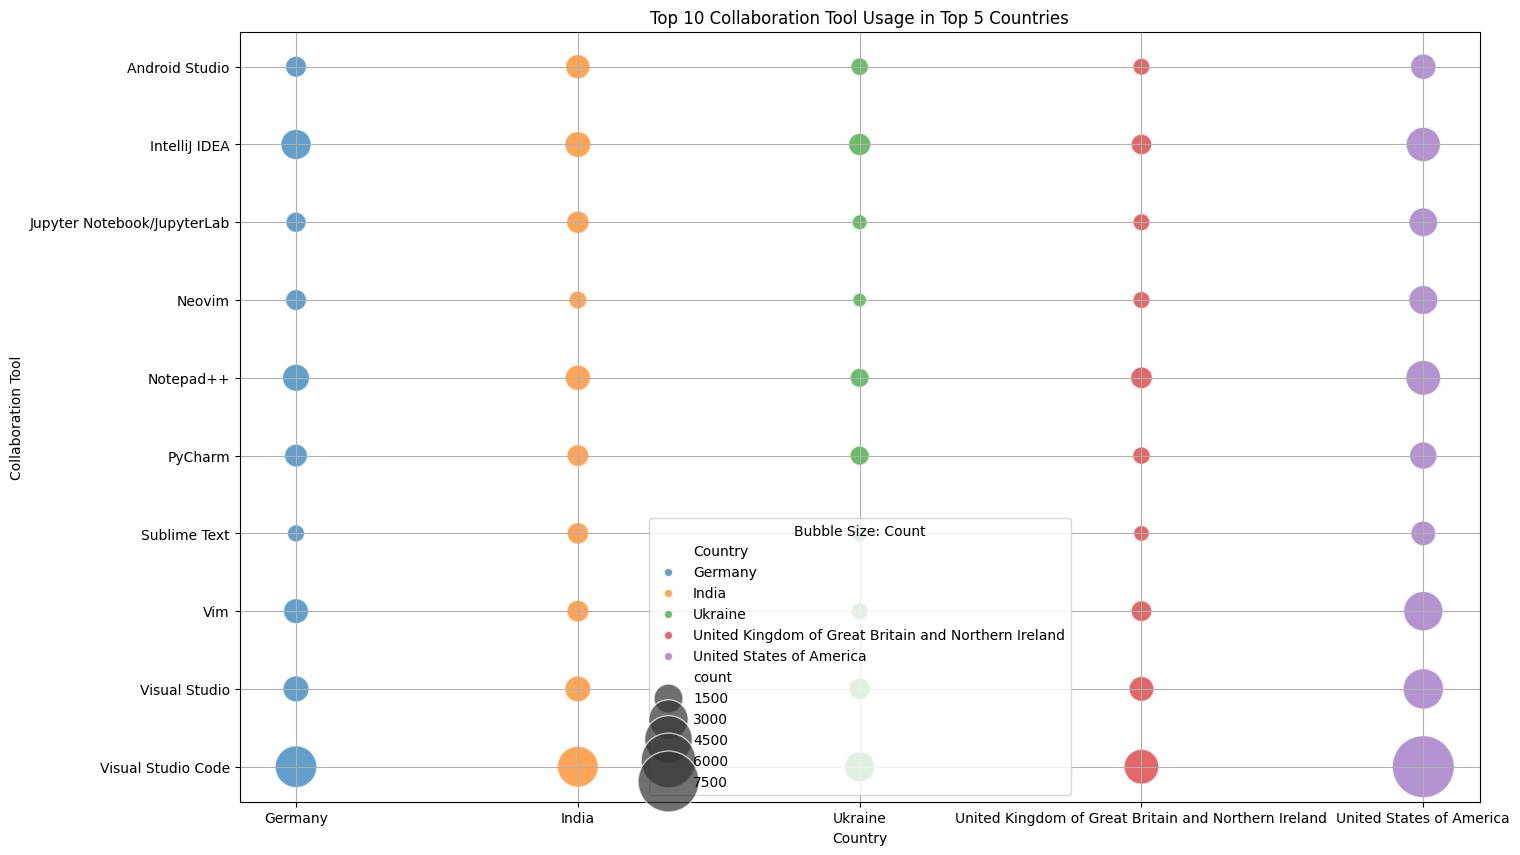

In [38]:
# --- 1. Clean and Prepare Data ---
df_tools_country = df[['NEWCollabToolsHaveWorkedWith', 'Country']].dropna().copy()
# Filter for top 5 countries
df_tools_top5 = df_tools_country[df_tools_country['Country'].isin(top_5_countries)]

# Explode tools and group to get counts
df_tools_exploded = df_tools_top5.assign(Tool=df_tools_top5['NEWCollabToolsHaveWorkedWith'].str.split(';')).explode('Tool')
tools_country_counts = df_tools_exploded.groupby(['Country', 'Tool']).size().reset_index(name='count')
# Filter for top 10 tools
top_10_tools = df_tools_exploded['Tool'].value_counts().head(10).index
tools_counts_top10 = tools_country_counts[tools_country_counts['Tool'].isin(top_10_tools)]

# --- 2. Create the Plot ---
plt.figure(figsize=(16, 10))
sns.scatterplot(data=tools_counts_top10, x='Country', y='Tool', size='count',
                alpha=0.7, sizes=(100, 2000), hue='Country')
plt.title('Top 10 Collaboration Tool Usage in Top 5 Countries')
plt.xlabel('Country')
plt.ylabel('Collaboration Tool')
plt.legend(title='Bubble Size: Count')
plt.grid(True)
plt.show()

### Task 4: Visualizing Technology Trends Using Bubble Plots


#### 1. Bubble Plot for Preferred Web Frameworks vs. Job Satisfaction

- Explore the relationship between preferred web frameworks (`WebframeWantToWorkWith`) and job satisfaction.

- Use bubble size to represent the number of respondents.



C:\Users\Sebastian\AppData\Local\Temp\ipykernel_22832\2846900837.py:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=top_10_webs, x='avg_satisfaction', y='Webframe', size='count',


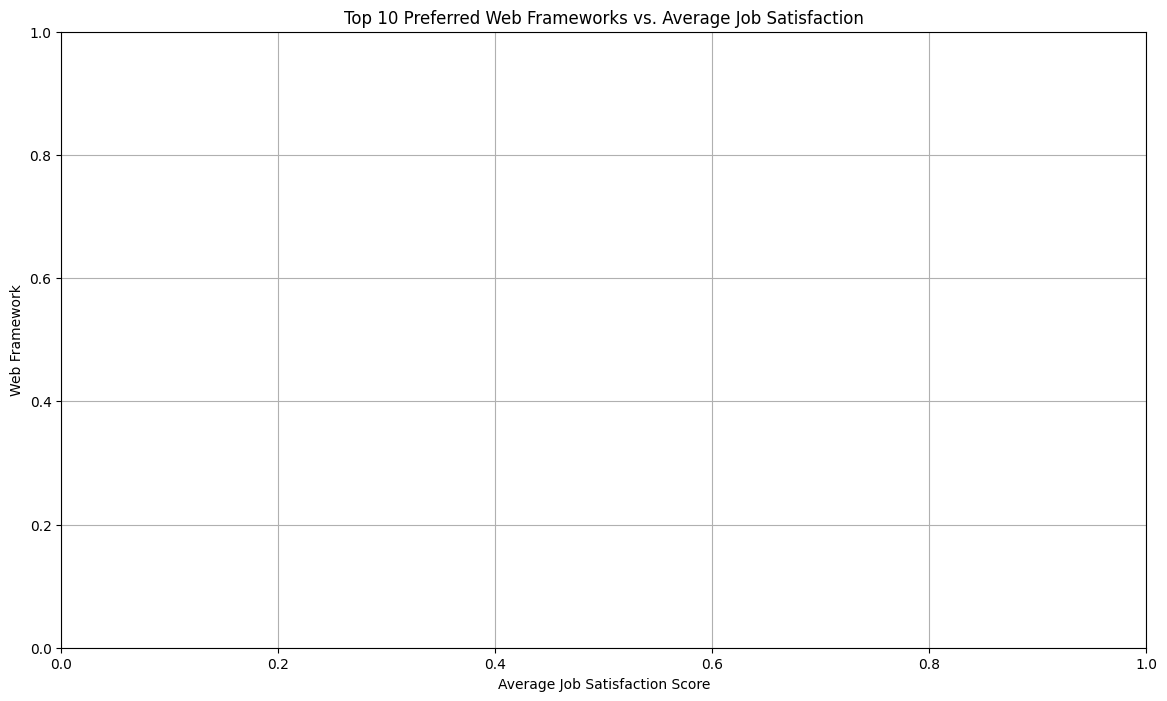

In [39]:
# --- 1. Clean and Prepare Data ---
df_web_sat = df[['WebframeWantToWorkWith', 'JobSat']].dropna().copy()
df_web_sat['JobSat_numeric'] = df_web_sat['JobSat'].map(job_sat_mapping)
df_web_sat.dropna(subset=['JobSat_numeric'], inplace=True)
df_web_exploded = df_web_sat.assign(Webframe=df_web_sat['WebframeWantToWorkWith'].str.split(';')).explode('Webframe')

# Group to get count and average satisfaction
web_summary = df_web_exploded.groupby('Webframe').agg(
    count=('Webframe', 'size'),
    avg_satisfaction=('JobSat_numeric', 'mean')
).reset_index()
# Filter for top 10 most desired frameworks
top_10_webs = web_summary.sort_values('count', ascending=False).head(10)

# --- 2. Create the Plot ---
plt.figure(figsize=(14, 8))
sns.scatterplot(data=top_10_webs, x='avg_satisfaction', y='Webframe', size='count',
                alpha=0.7, sizes=(200, 2000), hue='Webframe', palette='rocket', legend=False)
plt.title('Top 10 Preferred Web Frameworks vs. Average Job Satisfaction')
plt.xlabel('Average Job Satisfaction Score')
plt.ylabel('Web Framework')
plt.grid(True)
plt.show()

#### 2. Bubble Plot for Admired Technologies Across Countries

- Visualize the distribution of admired technologies (`LanguageAdmired`) across different countries (`Country`).

- Use bubble size to represent the frequency of admiration.



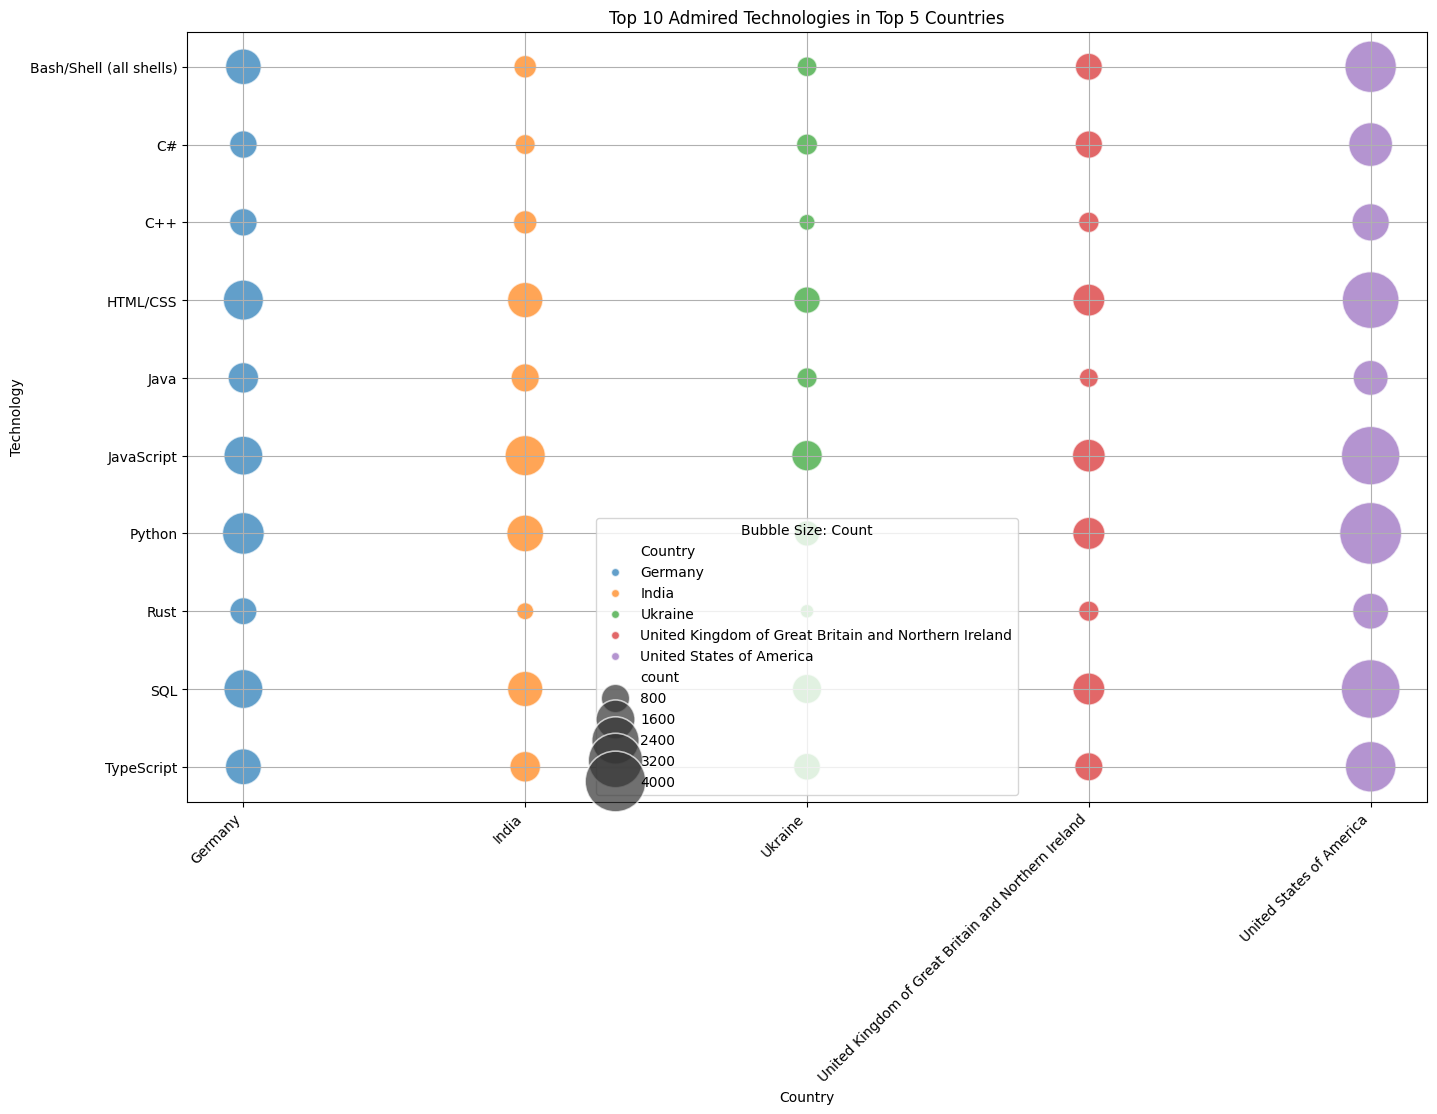

In [40]:
# --- 1. Clean and Prepare Data ---
df_admired_country = df[['LanguageAdmired', 'Country']].dropna().copy()
# Filter for top 5 countries
df_admired_top5 = df_admired_country[df_admired_country['Country'].isin(top_5_countries)]

# Explode languages and group to get counts
df_admired_exploded = df_admired_top5.assign(Language=df_admired_top5['LanguageAdmired'].str.split(';')).explode('Language')
admired_counts = df_admired_exploded.groupby(['Country', 'Language']).size().reset_index(name='count')
# Filter for top 10 most admired languages overall
top_10_admired = df_admired_exploded['Language'].value_counts().head(10).index
admired_counts_top10 = admired_counts[admired_counts['Language'].isin(top_10_admired)]

# --- 2. Create the Plot ---
plt.figure(figsize=(16, 10))
sns.scatterplot(data=admired_counts_top10, x='Country', y='Language', size='count',
                alpha=0.7, sizes=(100, 2000), hue='Country')
plt.title('Top 10 Admired Technologies in Top 5 Countries')
plt.xlabel('Country')
plt.ylabel('Technology')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Bubble Size: Count')
plt.grid(True)
plt.show()

## Final Step: Review


After completing the lab, you will have extensively used bubble plots to gain insights into developer community preferences, demographics, compensation trends, and job satisfaction.


## Summary


After completing this lab, you will be able to:

- Create and interpret bubble plots to analyze relationships and compositions within datasets.

- Use bubble plots to explore developer preferences, compensation trends, and satisfaction levels.

- Apply bubble plots to visualize complex relationships involving multiple dimensions effectively.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-29|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
